In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
df_acquisitions = pd.read_csv('data/cb_acquisitions.csv', parse_dates=['acquired_at'])

In [12]:
df_acquisitions.head().T

,0,1,2,3,4
id,1,2,3,4,5
acquisition_id,1,7,8,9,10
acquiring_object_id,c:11,c:59,c:24,c:59,c:212
acquired_object_id,c:10,c:72,c:132,c:155,c:215
term_code,NaN,cash,cash,cash,cash
price_amount,2e+07,6e+07,2.8e+08,1e+08,2.5e+07
price_currency_code,USD,USD,USD,USD,USD
acquired_at,2007-05-30 00:00:00,2007-07-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00
source_url,http://venturebeat.com/2007/05/30/fox-interact...,http://www.techcrunch.com/2007/07/02/deal-is-c...,http://www.techcrunch.com/2007/05/30/cbs-acqui...,http://techcrunch.com/2007/05/23/100-million-p...,http://blog.seattlepi.nwsource.com/venture/arc...
source_description,Fox Interactive confirms purchase of Photobuck...,Deal is Confirmed: Google Acquired GrandCentral,CBS Acquires Europeâ€™s Last.fm for $280 million,$100 Million Payday For Feedburner – This Deal...,seatlepi.com


In [13]:
df_acquisitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 12 columns):
id                     9562 non-null int64
acquisition_id         9562 non-null int64
acquiring_object_id    9562 non-null object
acquired_object_id     9561 non-null object
term_code              1906 non-null object
price_amount           2601 non-null float64
price_currency_code    9558 non-null object
acquired_at            9533 non-null datetime64[ns]
source_url             8566 non-null object
source_description     8590 non-null object
created_at             9562 non-null object
updated_at             9562 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 896.5+ KB


interesting to note is that in the investment data we found that we had information about 17000 companies and this dataset gives us information about 95662  companies. from this we can speculate to say only 1 in 10 companies that recieve funding end up getting acquired. Thus our dataset is going to be imbalanced and we should take that into account when developing our models

In [15]:
df_acquisitions['month'] = df_acquisitions['acquired_at'].apply(lambda x: x.month)

In [16]:
df_acquisitions['year'] = df_acquisitions['acquired_at'].apply(lambda x: x.year)

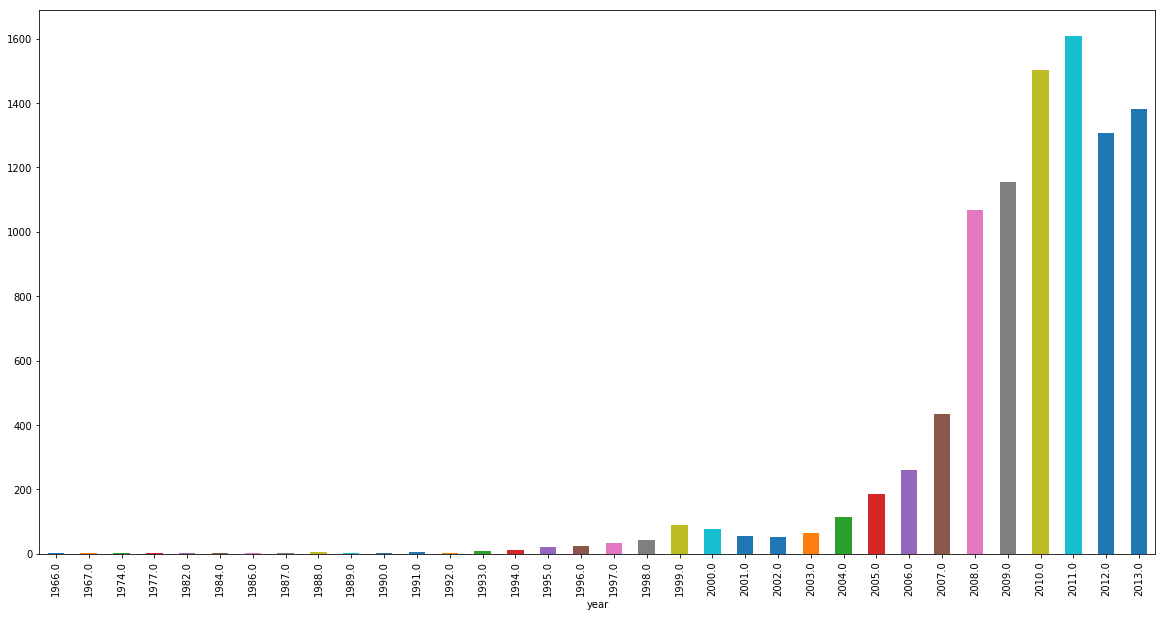

In [17]:
df_acquisitions.groupby(['year']).count()['id'].plot(kind="bar", figsize=(20,10));

we have information about companies from 1966 to 2013. form the bar graph aboue it shows that the number of companies getting acquired has been exponentially increasing over time, but seems to have reached a plateau sincethe peak of 2011. again we notice the 2007 recession had no impact on acquisitions. although it seems to have been affected during the dot com burst and no meaningful amount of acquisitions prior to that.

In [18]:
df_acquisitions['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)